# 金利変動シミュレーションプログラム

## 概要
このプログラムは、景気シグナルに基づいて金利変動をシミュレーションし、時間経過に伴う累積金利の推移をプロットします。シミュレーションは複数回行われ、結果を比較可能な形で視覚化します。

## 特徴
- **景気シグナル**: 「良い」「やや良い」「中立」「やや悪い」「悪い」の5段階のシグナルを使用。
- **金利変動**: 金利の増減（0.5、0.25、0、-0.25、-0.5）を累積して追跡。
- **確率行列**:
  - 景気シグナル -> 金利変動の遷移確率。
  - 金利変動 -> 次期景気シグナルへの影響確率。
- **複数シミュレーション**: 各シミュレーションの結果をグラフで比較。

## 必要な環境
- Python 3.7以上
- 必要なライブラリ:
  - `numpy`
  - `random`
  - `matplotlib`

## 使用方法
1. 必要なライブラリをインストールしてください。
   ```bash
   pip install matplotlib numpy

FY 1:(期首) 景気シグナル = 中立,(期末) 金利水準 = 3.25, 次の景気シグナル = やや悪い
FY 2:(期首) 景気シグナル = やや悪い,(期末) 金利水準 = 2.75, 次の景気シグナル = 中立
FY 3:(期首) 景気シグナル = 中立,(期末) 金利水準 = 2.5, 次の景気シグナル = 中立
FY 4:(期首) 景気シグナル = 中立,(期末) 金利水準 = 2.25, 次の景気シグナル = 中立
FY 5:(期首) 景気シグナル = 中立,(期末) 金利水準 = 2.25, 次の景気シグナル = 良い
FY 6:(期首) 景気シグナル = 良い,(期末) 金利水準 = 2.5, 次の景気シグナル = やや良い
FY 7:(期首) 景気シグナル = やや良い,(期末) 金利水準 = 2.5, 次の景気シグナル = やや良い
FY 8:(期首) 景気シグナル = やや良い,(期末) 金利水準 = 2.5, 次の景気シグナル = やや良い
FY 9:(期首) 景気シグナル = やや良い,(期末) 金利水準 = 2.75, 次の景気シグナル = やや悪い
FY 10:(期首) 景気シグナル = やや悪い,(期末) 金利水準 = 2.75, 次の景気シグナル = 悪い


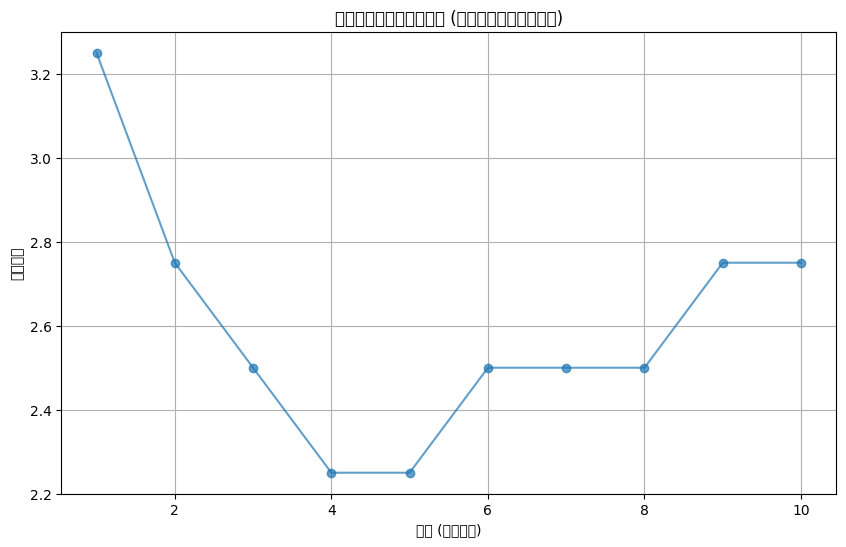

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 遷移確率行列（景気シグナル -> 金利変動）
transition_matrix = {
    "良い":         [0.75, 0.25, 0, 0, 0],
    "やや良い":     [0.25, 0.25, 0.5, 0, 0],
    "中立":         [0, 0.25, 0.5, 0.25, 0],
    "やや悪い":     [0, 0, 0.5, 0.25, 0.25],
    "悪い":         [0, 0, 0, 0.25, 0.75]
}

# 金利推移と景気シグナルへの影響確率行列(金利変動 -> 次期の景気シグナル)
interest_to_signal_matrix = {
    0.5:            [0, 0, 0, 0.25, 0.75],
    0.25:           [0, 0.17, 0.33, 0.33, 0.17],
    0:              [0.2, 0.2, 0.2, 0.2, 0.2],
    -0.25:          [0.17, 0.33, 0.33, 0.17, 0],
    -0.5:           [0.75, 0.25, 0, 0, 0]
}

# 金利変動リスト
interest_rate_changes = [0.5, 0.25, 0, -0.25, -0.5]

# 景気シグナルのリスト
signals = ["良い", "やや良い", "中立", "やや悪い", "悪い"]

# シグナルから次期の金利変動をシミュレーションする関数
def simulate_next_rate(current_signal):
    if current_signal not in transition_matrix:
        raise ValueError("無効な景気シグナルです。")

    # 現在のシグナルに基づく遷移確率を取得
    probabilities = transition_matrix[current_signal]

    # 金利変動を確率的に選択
    next_rate = random.choices(interest_rate_changes, weights=probabilities, k=1)[0]
    return next_rate

# 金利変動から次期の景気シグナルをシミュレーションする関数
def simulate_next_signal(current_signal, rate_change):
    # 現在のシグナルのインデックスを取得
    current_index = signals.index(current_signal)

    # 景気シグナル変動インデックスの計算
    probabilities = interest_to_signal_matrix[rate_change]
    shift = random.choices(range(-2, 3), weights=probabilities, k=1)[0]
    new_index = current_index + shift

    # 境界条件を考慮した新しいインデックスの調整
    new_index = max(0, min(len(signals) - 1, new_index))

    return signals[new_index]

# 景気シグナルと金利変動の推移をシミュレーションする関数
def simulate_economy(initial_signal, steps):
    current_signal = initial_signal
    current_rate = 3  # 初期金利を0とする
    rate_history = []

    for step in range(steps):
        # 次期の金利変動をシミュレーション
        next_rate_change = simulate_next_rate(current_signal)

        # 累積金利を更新
        current_rate += next_rate_change

        # 次期の景気シグナルをシミュレーション
        next_signal = simulate_next_signal(current_signal, next_rate_change)

        rate_history.append((current_signal, current_rate, next_signal))

        # 現在の状態をプリント
        print(f"FY {step + 1}:(期首) 景気シグナル = {current_signal},(期末) 金利水準 = {current_rate}, 次の景気シグナル = {next_signal}")

        # 現在のシグナルを更新
        current_signal = next_signal

    return rate_history

# 初期設定
initial_signal = "中立"
steps = 10
simulations = 1

# シミュレーション実行
all_simulations = []
for _ in range(simulations):
    rate_history = simulate_economy(initial_signal, steps)
    all_simulations.append([rate for _, rate, _ in rate_history])

# グラフの描画
plt.figure(figsize=(10, 6))
for simulation in all_simulations:
    time_steps = list(range(1, steps + 1))
    plt.plot(time_steps, simulation, marker="o", linestyle="-", alpha=0.7)

plt.title("時間経過に伴う累積金利 (複数シミュレーション)")
plt.xlabel("時間 (ステップ)")
plt.ylabel("累積金利")
plt.grid(True)
plt.show()

# 業界別のトレンドルール設定

## 概要
作成するベンチャー企業が属する業界に関するトレンドのルールを設定する。各業界は1年後の期待成長率、リスクについてのシナリオを有する。また、景気シグナルによって、シナリオが影響を受け、期待成長率、リスクが変動する

### 将来シナリオ
各業界は将来シナリオとして上位、中位、下位の3種類のシナリオを持つ。
- **例①　A業界** 
    - 上位: 期待売上成長率100％
    - 中位: 期待売上成長率25％
    - 下位: 期待売上成長率-50％

- **例②　B業界** 
    - 上位: 期待売上成長率50％
    - 中位: 期待売上成長率25％
    - 下位: 期待売上成長率0％

このシナリオの期待値やボラティリティで業界の特徴を表現する。

### 景気シグナルによるシナリオの変動

景気シグナルは各業界のシナリオに対して影響を与える。どのように影響を与えるかは各業界で異なる

- **例①: A業界**
    - 景気シグナル: 
        - 良い          ---> 期待売上成長率 **+50%**
        - やや良い      ---> 期待売上成長率 **+25%**
        - 中立          ---> 期待売上成長率 **+0%**
        - やや悪い      ---> 期待売上成長率 **-25%**
        - 悪い          ---> 期待売上成長率 **-50%**

- **例②: B業界**
    - 景気シグナル: 
        - 良い          ---> 期待売上成長率 **+10%**
        - やや良い      ---> 期待売上成長率 **+5%**
        - 中立          ---> 期待売上成長率 **+0%**
        - やや悪い      ---> 期待売上成長率 **-5%**
        - 悪い          ---> 期待売上成長率 **-10%**

景気シグナルが業界シナリオに与える影響は各業界で異なるように設定する。これにより業界の景気感度等を表現する。

## 実装環境

Excelによる実装が一番よさそう(その場合どのように金利変動シミュレーションを統合するかが問題)

# 各投資先企業のルール設定

各投資先企業のルールは、その企業が属する業種のシナリオをベースに、

## 概要

## 企業情報

